<a href="https://colab.research.google.com/github/Yenuli0808/CM2604_Telco_Customer_Churn-CW/blob/main/notebooks/Task_02/03_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 03: Modeling Decision Tress and Neural Network Models**

**3.a: Import Libraries**

---



In [1]:
import sys, os, joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve, precision_recall_curve, auc, brier_score_loss,precision_score, recall_score, f1_score)
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

RANDOM_STATE = 42

print("Versions Being Used :\n")
print("Python:", sys.version.split()[0])
print("pandas:", pd.__version__, "numpy:", np.__version__)
import sklearn
print("sklearn:", sklearn.__version__)
import imblearn
print("imblearn:", imblearn.__version__)
import tensorflow as tf
print("tensorflow:", tf.__version__)

print("\n✅ Libraries imported successfully!")

Versions Being Used :

Python: 3.12.12
pandas: 2.2.2 numpy: 2.0.2
sklearn: 1.6.1
imblearn: 0.14.0
tensorflow: 2.19.0

✅ Libraries imported successfully!


**3.b: Import Cleaned Data Set**

---



In [2]:
# Load the cleaned data set from the git
url_clean = "https://raw.githubusercontent.com/Yenuli0808/CM2604_Telco_Customer_Churn-CW/main/data/Cleaned_Telco_Customer_Churn.csv"

df = pd.read_csv(url_clean)

print("✅ Cleaned Dataset loaded successfully!")
print("\n=== Cleaned Data set overview ===")
print(f"Dataset shape: {df.shape}")

✅ Cleaned Dataset loaded successfully!

=== Cleaned Data set overview ===
Dataset shape: (7032, 27)


**3.c: Quick Look-up on Dataset**

---



In [3]:
# First look at the cleaned dataset
print("==== FIRST 10 ROWS ====\n")
df.head(10)

==== FIRST 10 ROWS ====



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,TenureGroup,MonthlyChargeGroup,ChargesRatio,ServiceCount,IsLongTermCustomer,IsAutoPay,HasInternet
0,Female,0,1,0,1,0,0,DSL,0,1,...,29.85,29.85,0,0-12,Low,0.967585,1,0,0,1
1,Male,0,0,0,34,1,0,DSL,1,0,...,56.95,1889.50,0,25-48,Medium,32.605695,3,1,0,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,53.85,108.15,1,0-12,Medium,1.971741,3,0,0,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,42.30,1840.75,0,25-48,Medium,42.511547,3,1,1,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,70.70,151.65,1,0-12,High,2.115063,1,0,0,1
5,Female,0,0,0,8,1,1,Fiber optic,0,0,...,99.65,820.50,1,0-12,High,8.152012,5,0,0,1
6,Male,0,0,1,22,1,1,Fiber optic,0,1,...,89.10,1949.40,0,13-24,High,21.635960,4,0,1,1
7,Female,0,0,0,10,0,0,DSL,1,0,...,29.75,301.90,0,0-12,Low,9.817886,1,0,0,1
8,Female,0,1,0,28,1,1,Fiber optic,0,0,...,104.80,3046.05,1,25-48,Very High,28.790643,6,1,0,1
9,Male,0,0,1,62,1,0,DSL,1,1,...,56.15,3487.95,0,61-72,Medium,61.031496,3,1,1,1


In [4]:
print("\nClass distribution:\n")
class_dist = pd.DataFrame({
    "Count": df["Churn"].value_counts(),
    "Percentage (%)": (df["Churn"].value_counts(normalize=True) * 100).round(2)
})
class_dist


Class distribution:



,Count,Percentage (%)
Churn,,
0,5163,73.42
1,1869,26.58


**3.d: Train-Test Split (stratified) and Variable Lists**

---



In [5]:
# Defining features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

# Class distribution in training set
churn_table_train = pd.DataFrame({
    'Count': y_train.value_counts(),
    'Percentage (%)': (y_train.value_counts(normalize=True) * 100).round(2)
})

# Class distribution in testing set
churn_table_test = pd.DataFrame({
    'Count': y_test.value_counts(),
    'Percentage (%)': (y_test.value_counts(normalize=True) * 100).round(2)
})

print("Training set: ", X_train.shape)
print("\nClass distribution in training set: ")
print(churn_table_train)

print("\nTesting set: ", X_test.shape)
print("\nClass distribution in testing set: ")
print(churn_table_test)

# Combine the tables for a comprehensive view
combined_churn_distribution = pd.concat({
    'Train': churn_table_train,
    'Test': churn_table_test
}, axis=1)

print("\nCombined Class Distribution (Train vs. Test):\n")
print(combined_churn_distribution)

Training set:  (5625, 26)

Class distribution in training set: 
       Count  Percentage (%)
Churn                       
0       4130           73.42
1       1495           26.58

Testing set:  (1407, 26)

Class distribution in testing set: 
       Count  Percentage (%)
Churn                       
0       1033           73.42
1        374           26.58

Combined Class Distribution (Train vs. Test):

      Train                 Test               
      Count Percentage (%) Count Percentage (%)
Churn                                          
0      4130          73.42  1033          73.42
1      1495          26.58   374          26.58


In [6]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical columns:", categorical_cols,"\n")
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'TenureGroup', 'MonthlyChargeGroup'] 

Numerical columns: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'ChargesRatio', 'ServiceCount', 'IsLongTermCustomer', 'IsAutoPay', 'HasInternet']


**3.e: Preprocessing Pipeline**

---



In [7]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'),categorical_cols)
])

print("✅ Preprocessing pipeline created successfully!")
print("\n=== Preprocessing pipeline overview ===")
preprocessor

✅ Preprocessing pipeline created successfully!

=== Preprocessing pipeline overview ===


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['SeniorCitizen', 'Partner', 'Dependents',
                                  'tenure', 'PhoneService', 'MultipleLines',
                                  'OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport',
                                  'StreamingTV', 'StreamingMovies',
                                  'PaperlessBilling', 'MonthlyCharges',
                                  'TotalCharges', 'ChargesRatio',
                                  'ServiceCount', 'IsLongTermCustomer',
                                  'IsAutoPay', 'HasInternet']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['gender', 'InternetService', 'Contract',
                                  'PaymentMethod', 'TenureGroup',
                                  'MonthlyChargeGroup'])])

In [8]:
# Fit transform train, transform test
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

print("✅ Preprocessing completed successfully!")
print("\n=== Preprocessed Data set overview ===")
print(f"\nTraining set shape: {X_train_preprocessed.shape}")
print(f"Testing set shape: {X_test_preprocessed.shape}")

✅ Preprocessing completed successfully!

=== Preprocessed Data set overview ===

Training set shape: (5625, 35)
Testing set shape: (1407, 35)


**3.f: Helper Evaluate Functions**

---



In [9]:
def print_eval_full(model_name,
                    y_train, y_train_pred, y_train_proba,
                    y_test,  y_test_pred,  y_test_proba):

    print("="*60)
    print(f"MODEL EVALUATION: {model_name}")
    print("="*60)

    # -------------------------
    # TRAINING METRICS
    # -------------------------
    print("\n TRAINING PERFORMANCE")
    print("Accuracy:", round(accuracy_score(y_train, y_train_pred)*100, 4))
    print("ROC AUC:", round(roc_auc_score(y_train, y_train_proba), 4))
    print("\nClassification Report (Train):")
    print(classification_report(y_train, y_train_pred))

    cm_train = confusion_matrix(y_train, y_train_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Reds')
    plt.title(f"Confusion Matrix - TRAIN ({model_name})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    # -------------------------
    # TESTING METRICS
    # -------------------------
    print("\n TESTING PERFORMANCE")
    print("Accuracy:", round(accuracy_score(y_test, y_test_pred)*100, 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_test_proba), 4))
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    cm_test = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - TEST ({model_name})")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.show()

    print("="*60)


# **3.1: Decision Tree Model**

---



**3.1.1: Hyperparameter tuning for Decision Tress**

In [10]:
depths = [3,5,7,10,None]
min_sample_split = [2,5,10]
min_sample_leaf = [1,2,4]
criterion = ['gini', 'entropy']

best_dt_auc = -1
best_dt_params = {}
best_model_dt = None
results = []

for d in depths:
  for ms in min_sample_split:
    for ml in min_sample_leaf:
      for crit in criterion:
        dt = DecisionTreeClassifier(
          max_depth=d,
          min_samples_split=ms,
          min_samples_leaf=ml,
          criterion=crit,
          random_state=RANDOM_STATE
      )
      dt.fit(X_train_preprocessed, y_train)
      proba = dt.predict_proba(X_test_preprocessed)[:, 1]
      auc_score = roc_auc_score(y_test, proba)
      results.append((auc_score, d, ms, ml))

      if auc_score > best_dt_auc:
        best_dt_auc = auc_score
        best_model_dt = dt
        best_dt_params = {'depths':d, 'min_sample_split':ms, 'min_sample_leaf':ml, "criterion":crit }


print("Best DT Parameters:", best_dt_params)
print("\nBest DT AUC Score:", best_dt_auc)

#Showing top 5 configs by AUC
results_sorted = sorted(results, reverse=True, key=lambda x: x[0])[:5]
print("\nTop 5 DT Configurations:")
for r in results_sorted:
  print(f"AUC: {r[0]}, Depth: {r[1]}, Min Sample Split: {r[2]}, Min Sample Leaf: {r[3]}")

# Croo validation on train for best config (stability)
cv_scores = cross_val_score(best_model_dt, X_train_preprocessed, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
print("\nCV AUC (train) for best DT: %.4f ± %.4f" % (cv_scores.mean(), cv_scores.std()))

Best DT Parameters: {'depths': 7, 'min_sample_split': 2, 'min_sample_leaf': 4, 'criterion': 'entropy'}

Best DT AUC Score: 0.8225535924129399

Top 5 DT Configurations:
AUC: 0.8225535924129399, Depth: 7, Min Sample Split: 2, Min Sample Leaf: 4
AUC: 0.8225535924129399, Depth: 7, Min Sample Split: 5, Min Sample Leaf: 4
AUC: 0.8224060547390653, Depth: 7, Min Sample Split: 2, Min Sample Leaf: 1
AUC: 0.822165335376428, Depth: 7, Min Sample Split: 2, Min Sample Leaf: 2
AUC: 0.8220773304481522, Depth: 7, Min Sample Split: 5, Min Sample Leaf: 1

CV AUC (train) for best DT: 0.8177 ± 0.0162


**3.1.2: Decision Tree Evaluation**

MODEL EVALUATION: Decision Tree  - Test

 TRAINING PERFORMANCE
Accuracy: 80.8889
ROC AUC: 0.8745

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4130
           1       0.65      0.62      0.63      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.75      0.75      5625
weighted avg       0.81      0.81      0.81      5625



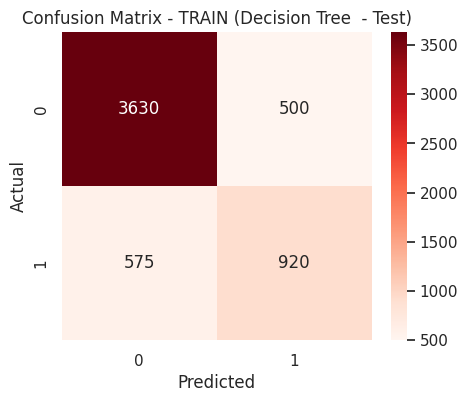


 TESTING PERFORMANCE
Accuracy: 78.8202
ROC AUC: 0.8226

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1033
           1       0.60      0.59      0.60       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



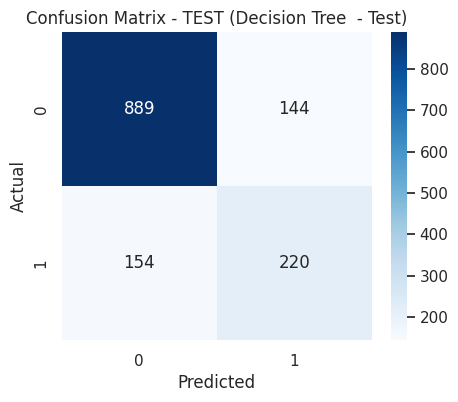

In [11]:
y_proba_dt = best_model_dt.predict_proba(X_test_preprocessed)[:,1]
y_pred_dt = (y_proba_dt > 0.5).astype(int)

y_pred_proba_train_dt = best_model_dt.predict_proba(X_train_preprocessed)[:,1]
y_pred_train_dt = (y_pred_proba_train_dt > 0.5).astype(int)
print_eval_full("Decision Tree  - Test",
                y_train, y_pred_train_dt, y_pred_proba_train_dt,
                y_test, y_pred_dt, y_proba_dt)

**3.1.2.1: ROC Curve**

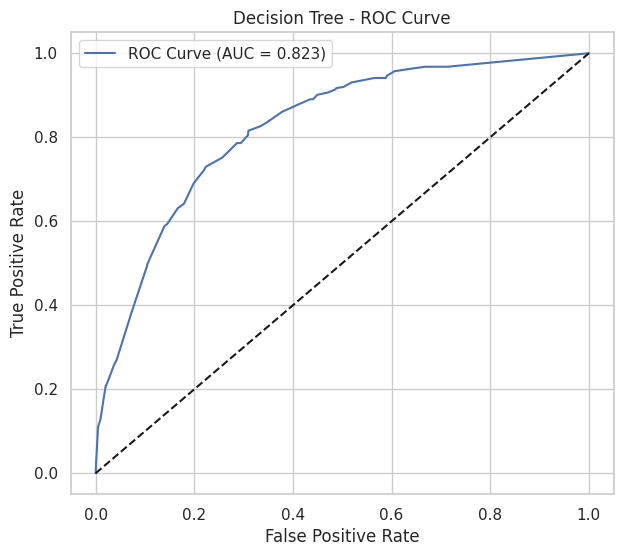

In [12]:
fpr_dt, tpr_dt, _ =roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(7,6))
plt.plot(fpr_dt, tpr_dt, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_dt):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('Decision Tree - ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

**3.1.2.2: DT-Precision Recall Curve**

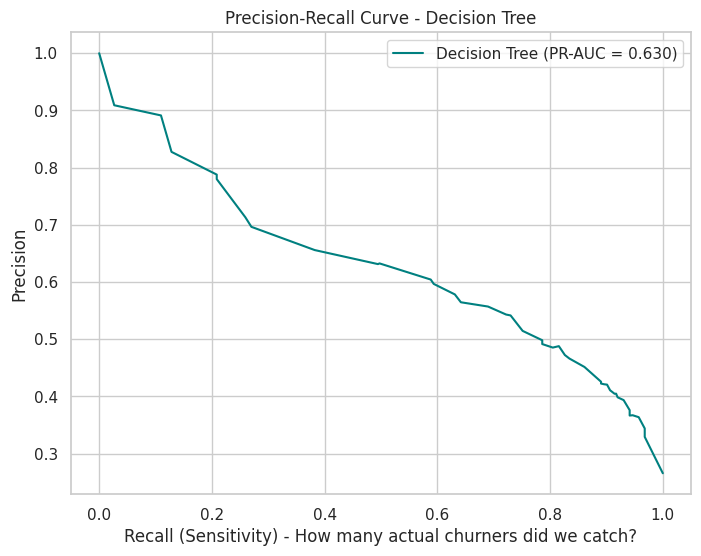

In [13]:
y_pred_proba_dt = best_model_dt.predict_proba(X_test_preprocessed)[:, 1]

precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)

plt.figure(figsize=(8,6))
plt.plot(recall_dt, precision_dt, label=f'Decision Tree (PR-AUC = {pr_auc_dt:.3f})', color='teal')
plt.xlabel('Recall (Sensitivity) - How many actual churners did we catch?')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

**3.1.3: DT- Feature Imporatance**

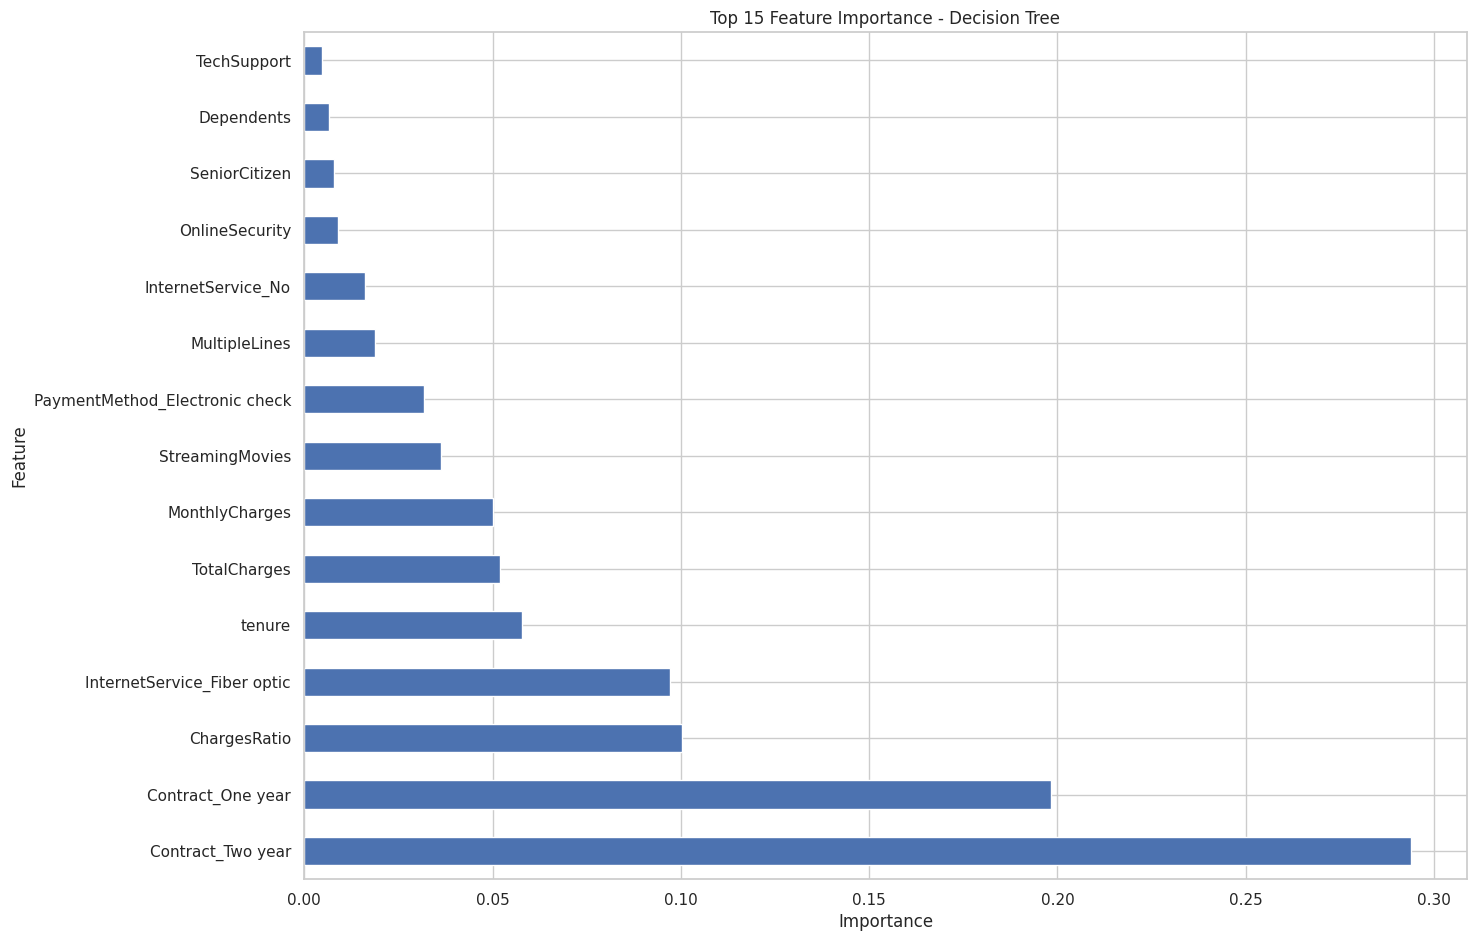

In [14]:
encoded_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols).tolist()
feature_names = numerical_cols + encoded_feature_names

importance = best_model_dt.feature_importances_
feat_imp = pd.Series(importance, index=feature_names).sort_values(ascending=False)[:15]

plt.figure(figsize=(15,11))
feat_imp.plot(kind='barh')
plt.title('Top 15 Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**3.1.4: BaseLine Decision Tree (No-Tuning)**

---



MODEL EVALUATION: Baseline Decision Tree (No Tuning)

 TRAINING PERFORMANCE
Accuracy: 80.8889
ROC AUC: 0.8745

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4130
           1       0.65      0.62      0.63      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.75      0.75      5625
weighted avg       0.81      0.81      0.81      5625



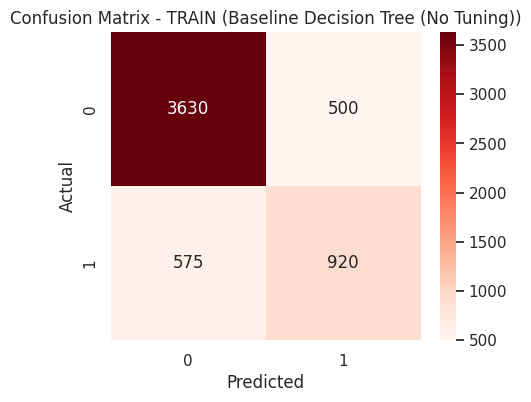


 TESTING PERFORMANCE
Accuracy: 71.2864
ROC AUC: 0.6452

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1033
           1       0.46      0.50      0.48       374

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



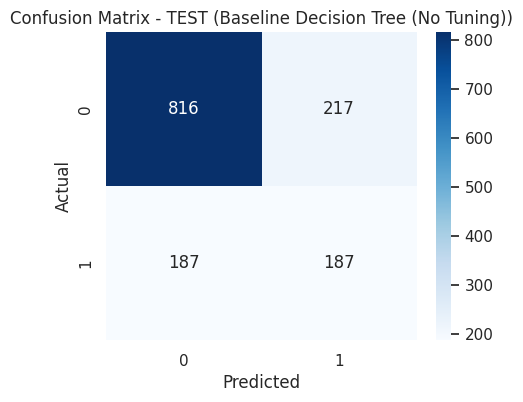

In [15]:
baseline_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
baseline_dt.fit(X_train_preprocessed, y_train)

y_proba_base_dt = baseline_dt.predict_proba(X_test_preprocessed)[:,1]
y_pred_base_dt = (y_proba_base_dt > 0.5).astype(int)

print_eval_full("Baseline Decision Tree (No Tuning)",
           y_train, y_pred_train_dt, y_pred_proba_train_dt,
           y_test, y_pred_base_dt, y_proba_base_dt)


# **3.2: Neural Network Model (Keras)**

---



**3.2.1: Hyperparameter tuning for NN**

In [16]:
import time
from tensorflow.keras.callbacks import EarlyStopping

layer_configs = [[64, 32], [128, 64], [128, 64, 32]]
learning_rates = [1e-3, 1e-4]
dropouts = [0.0,0.2]
epochs = 20
batch_size = 32

best_nn_acc = -1
best_nn = None
best_nn_params = {}
best_history = None
es = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
t0 = time.time()

for layers in layer_configs:
    for lr in learning_rates:
        for drop in dropouts:

            tf.keras.backend.clear_session()

            model = Sequential()
            model.add(Dense(layers[0], activation='relu', input_shape=(X_train_preprocessed.shape[1],)))
            if drop > 0:
                model.add(Dropout(drop))

            for units in layers[1:]:
                model.add(Dense(units, activation='relu'))
                if drop > 0:
                    model.add(Dropout(drop))

            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

            history = model.fit(X_train_preprocessed, y_train, validation_split=0.2,
                             epochs=epochs, batch_size=batch_size,callbacks=[es], verbose=0)

            test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=0) # Added verbose=0 to suppress output during tuning

            if test_acc > best_nn_acc:
                best_nn_acc = test_acc
                best_nn = model
                best_nn_params = {'layers': layers, 'lr': lr, 'dropout': drop}
                best_history = history

print("Best NN Parameters (manual tuning):", best_nn_params)
print("Best NN Testing Accuracy:", best_nn_acc)
print("Time elapsed (s):", round(time.time()-t0,2),"seconds")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best NN Parameters (manual tuning): {'layers': [128, 64, 32], 'lr': 0.001, 'dropout': 0.2}
Best NN Testing Accuracy: 0.8045486807823181
Time elapsed (s): 69.37 seconds


**3.2.2: NN Evaluation**

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MODEL EVALUATION: Neural Network(Tuning)

 TRAINING PERFORMANCE
Accuracy: 80.6756
ROC AUC: 0.8543

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4130
           1       0.66      0.55      0.60      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.80      5625



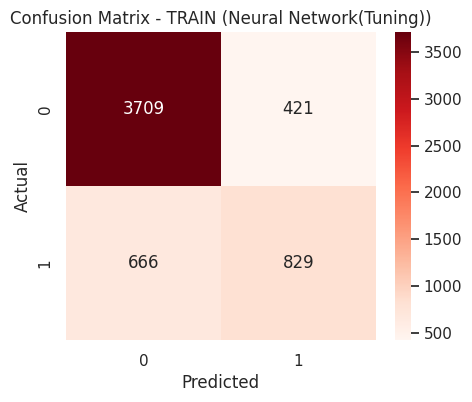


 TESTING PERFORMANCE
Accuracy: 80.4549
ROC AUC: 0.831

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



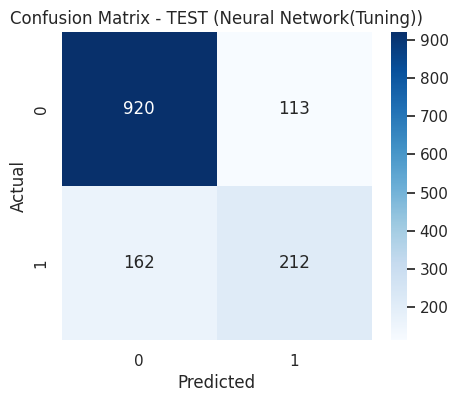

In [17]:
y_proba_nn = best_nn.predict(X_test_preprocessed).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

y_proba_train_nn = best_nn.predict(X_train_preprocessed).ravel()
y_pred_train_nn = (y_proba_train_nn > 0.5).astype(int)

print_eval_full("Neural Network(Tuning)",
                y_train, y_pred_train_nn, y_proba_train_nn,
                y_test, y_pred_nn, y_proba_nn)

**3.2.2.1: ROC Curve**

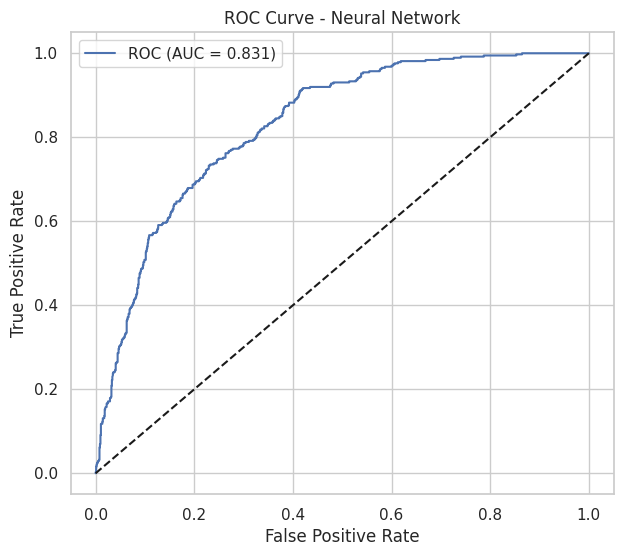

In [18]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn.flatten())
plt.figure(figsize=(7,6))
plt.plot(fpr_nn, tpr_nn, label=f'ROC (AUC = {roc_auc_score(y_test, y_proba_nn.flatten()):.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

**3.2.2.2: NN-Precision Recall Curve**

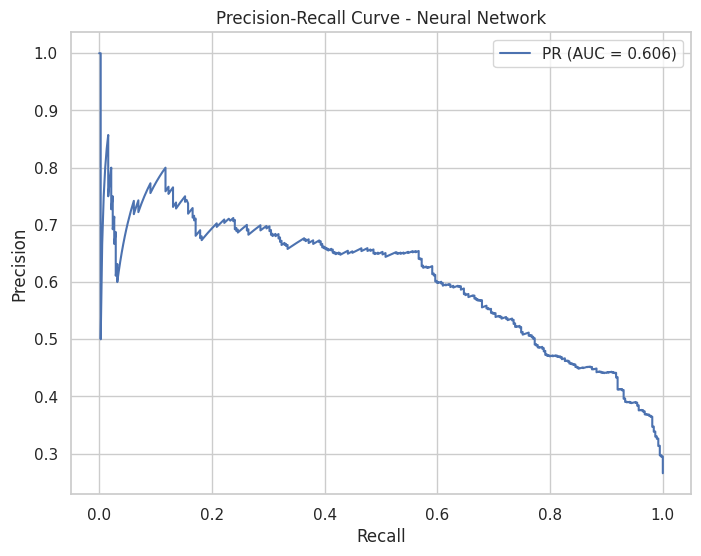

In [19]:
precision_nn, recall_nn, _ = precision_recall_curve(y_test, y_proba_nn.flatten())
plt.figure(figsize=(8,6))
plt.plot(recall_nn, precision_nn, label=f'PR (AUC = {auc(recall_nn, precision_nn):.3f})')
plt.title('Precision-Recall Curve - Neural Network')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

**3.2.2.3: Training Curves for NN**

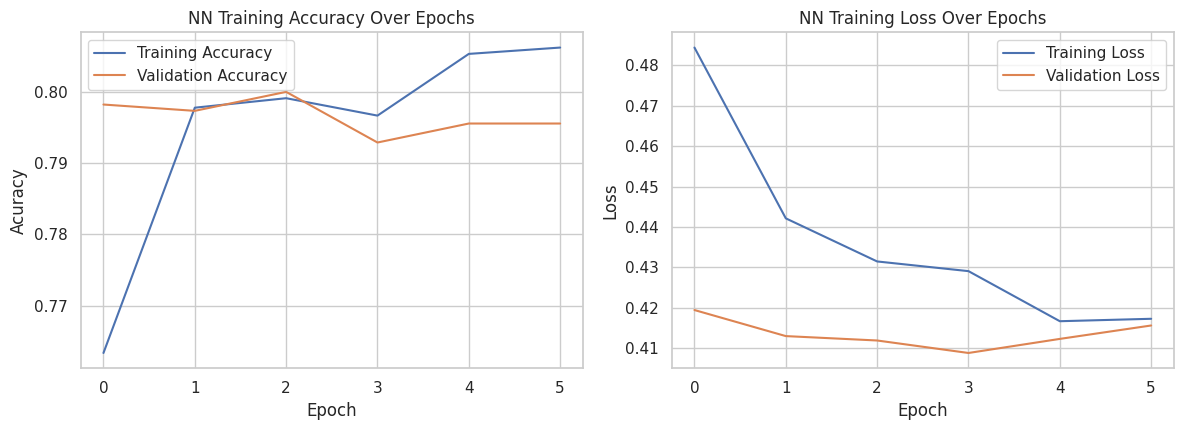

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('NN Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Acuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('NN Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**3.2.3: Baseline NN ( without tuning)**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MODEL EVALUATION: Baseline Neural Network (No Tuning, No SMOTE)

 TRAINING PERFORMANCE
Accuracy: 81.2089
ROC AUC: 0.8636

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4130
           1       0.68      0.56      0.61      1495

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.74      5625
weighted avg       0.80      0.81      0.81      5625



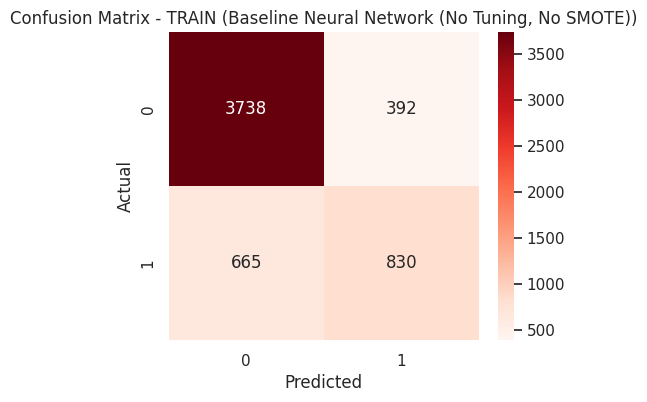


 TESTING PERFORMANCE
Accuracy: 79.1756
ROC AUC: 0.8285

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



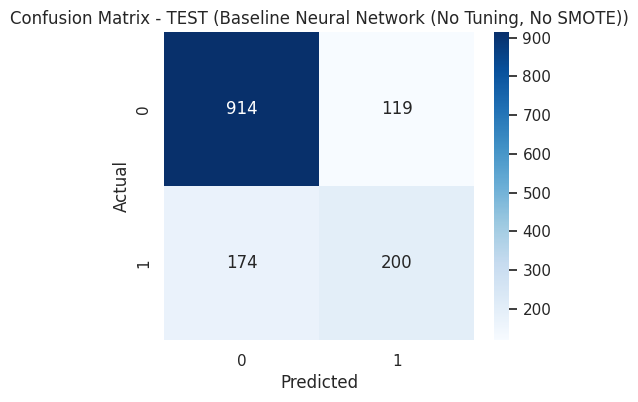

In [21]:
tf.keras.backend.clear_session()

baseline_nn = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(1, activation='sigmoid')
])

baseline_nn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

history_base_nn = baseline_nn.fit(
    X_train_preprocessed, y_train,
    validation_split=0.2,
    epochs=20, batch_size=32, verbose=0
)

y_proba_base_nn = baseline_nn.predict(X_test_preprocessed).ravel()
y_pred_base_nn = (y_proba_base_nn > 0.5).astype(int)

# Calculate predictions and probabilities for the training set
y_proba_train_base_nn = baseline_nn.predict(X_train_preprocessed).ravel()
y_pred_train_base_nn = (y_proba_train_base_nn > 0.5).astype(int)

print_eval_full("Baseline Neural Network (No Tuning, No SMOTE)",
           y_train, y_pred_train_base_nn, y_proba_train_base_nn,
           y_test, y_pred_base_nn, y_proba_base_nn)

# **3.3:Synthetic Minority Oversampling Technique (SMOTE)**

Only apply for the training dataset.

In [22]:
sm = SMOTE(random_state=RANDOM_STATE)
X_train_sm, y_train_sm = sm.fit_resample(X_train_preprocessed, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_sm))

Before SMOTE: [4130 1495]
After SMOTE: [4130 4130]


**3.3.1: Decision Tree tuning ( with SMOTE)**

---



In [23]:
best_auc_sm = -1
best_dt_sm = None
best_params_sm = None
results_sm = []

for d in depths:
    for ms in min_sample_split:
        for ml in min_sample_leaf:
            dt = DecisionTreeClassifier(max_depth=d, min_samples_split=ms,
                                        min_samples_leaf=ml, random_state=RANDOM_STATE)
            dt.fit(X_train_sm, y_train_sm)
            proba = dt.predict_proba(X_test_preprocessed)[:,1]
            auc_score = roc_auc_score(y_test, proba)
            results_sm.append((auc_score, d, ms, ml))
            if auc_score > best_auc_sm:
                best_auc_sm = auc_score
                best_dt_sm = dt
                best_params_sm = (d, ms, ml)

print("Best DT (SMOTE) params:", best_params_sm, "AUC:", best_auc_sm)
cv_scores_sm = cross_val_score(best_dt_sm, X_train_sm, y_train_sm, cv=5, scoring='roc_auc', n_jobs=-1)
print("CV AUC (SMOTE train) for best DT:", cv_scores_sm.mean(), cv_scores_sm.std())

Best DT (SMOTE) params: (5, 2, 4) AUC: 0.8093256751789865
CV AUC (SMOTE train) for best DT: 0.8645042475479132 0.024699413799088764


**3.3.1.1: Evaluate DT (With SMOTE)**

---



MODEL EVALUATION: Decision Tree (with SMOTE)

 TRAINING PERFORMANCE
Accuracy: 79.77
ROC AUC: 0.8763

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      4130
           1       0.77      0.84      0.81      4130

    accuracy                           0.80      8260
   macro avg       0.80      0.80      0.80      8260
weighted avg       0.80      0.80      0.80      8260



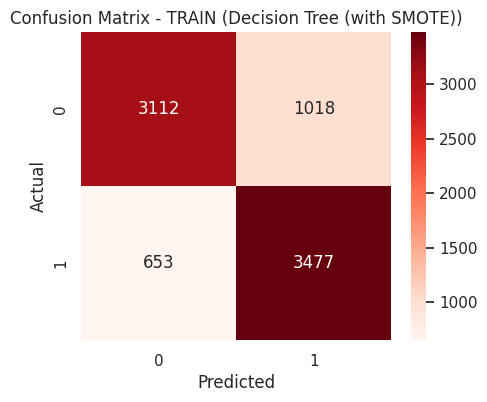


 TESTING PERFORMANCE
Accuracy: 73.8451
ROC AUC: 0.8093

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1033
           1       0.51      0.76      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.74      0.75      1407



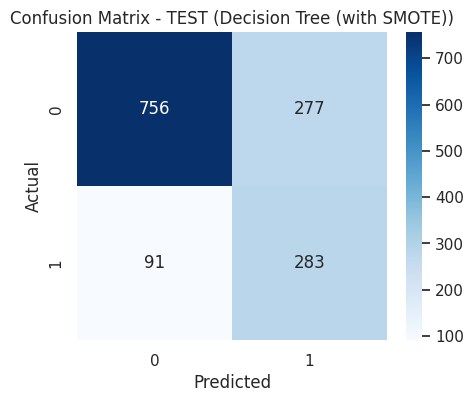

In [24]:
y_proba_dt_sm = best_dt_sm.predict_proba(X_test_preprocessed)[:,1]
y_pred_dt_sm = (y_proba_dt_sm > 0.5).astype(int)

y_pred_proba_train_dt_sm = best_dt_sm.predict_proba(X_train_sm)[:,1]
y_pred_train_dt_sm = (y_pred_proba_train_dt_sm > 0.5).astype(int)

print_eval_full("Decision Tree (with SMOTE)",
                y_train_sm, y_pred_train_dt_sm, y_pred_proba_train_dt_sm,
                y_test, y_pred_dt_sm, y_proba_dt_sm)

**3.3.2: Neural Network Training (With SMOTE)**

In [25]:
# tune (small grid) on SMOTE data
best_nn_acc_sm = -1
best_nn_sm = None
best_hist_sm = None
best_params_nn_sm = None
es = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
t0 = time.time()

for layers in layer_configs:
    for lr in learning_rates:
        for dr in dropouts:
            tf.keras.backend.clear_session()
            model = Sequential()
            model.add(Dense(layers[0], activation='relu', input_shape=(X_train_sm.shape[1],)))
            if dr > 0:
                model.add(Dropout(dr))
            for units in layers[1:]:
                model.add(Dense(units, activation='relu'))
                if dr > 0:
                    model.add(Dropout(dr))
            model.add(Dense(1, activation='sigmoid'))

            model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])

            hist = model.fit(X_train_sm, y_train_sm, validation_split=0.2,
                             epochs=epochs, batch_size=batch_size,callbacks=[es], verbose=0)

            test_loss, test_acc = model.evaluate(X_test_preprocessed, y_test, verbose=0)
            if test_acc > best_nn_acc_sm:
                best_nn_acc_sm = test_acc
                best_nn_sm = model
                best_hist_sm = hist
                best_params_nn_sm = {"layers": layers, "lr": lr, "dropout": dr}

print("Best NN (SMOTE) params:", best_params_nn_sm)
print("Best NN (SMOTE) test accuracy:", best_nn_acc_sm)
print("Time elapsed (s):", round(time.time()-t0,1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best NN (SMOTE) params: {'layers': [128, 64, 32], 'lr': 0.0001, 'dropout': 0.2}
Best NN (SMOTE) test accuracy: 0.778251588344574
Time elapsed (s): 113.6


**3.3.2.1: Evaluate NN (With SMOTE)**

---



44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
MODEL EVALUATION: Decision Tree (with SMOTE)

 TRAINING PERFORMANCE
Accuracy: 78.1235
ROC AUC: 0.8727

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      4130
           1       0.82      0.72      0.77      4130

    accuracy                           0.78      8260
   macro avg       0.78      0.78      0.78      8260
weighted avg       0.78      0.78      0.78      8260



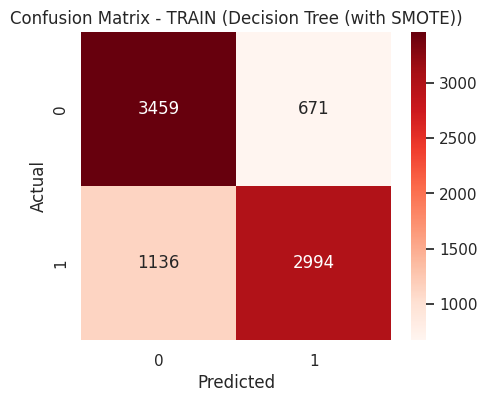


 TESTING PERFORMANCE
Accuracy: 77.8252
ROC AUC: 0.8337

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1033
           1       0.57      0.67      0.62       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407



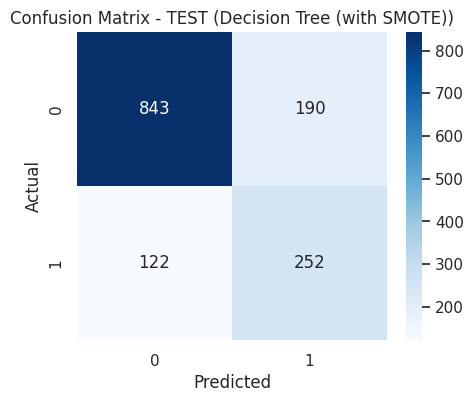

In [26]:
y_proba_nn_sm = best_nn_sm.predict(X_test_preprocessed).ravel()
y_pred_nn_sm = (y_proba_nn_sm > 0.5).astype(int)

y_pred_proba_train_nn_sm = best_nn_sm.predict(X_train_sm).ravel()
y_pred_train_nn_sm = (y_pred_proba_train_nn_sm > 0.5).astype(int)

print_eval_full("Decision Tree (with SMOTE)",
                y_train_sm, y_pred_train_nn_sm, y_pred_proba_train_nn_sm,
                y_test, y_pred_nn_sm, y_proba_nn_sm)

**3.3.2.2: Training Curves for NN**

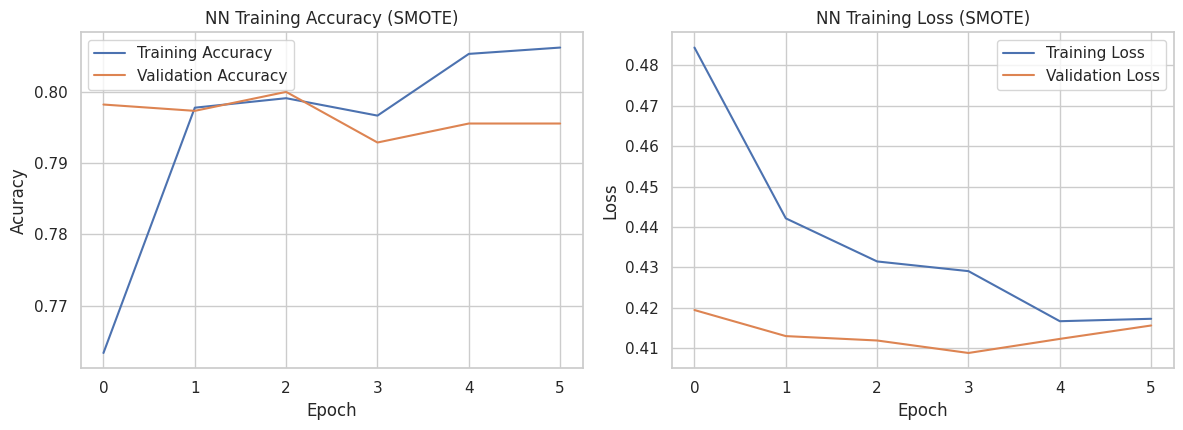

In [27]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(best_history.history['accuracy'], label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('NN Training Accuracy (SMOTE)')
plt.xlabel('Epoch')
plt.ylabel('Acuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(best_history.history['loss'], label='Training Loss')
plt.plot(best_history.history['val_loss'], label='Validation Loss')
plt.title('NN Training Loss (SMOTE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**3.3.2.3: ROC Comparison Plots (SMOTE)**

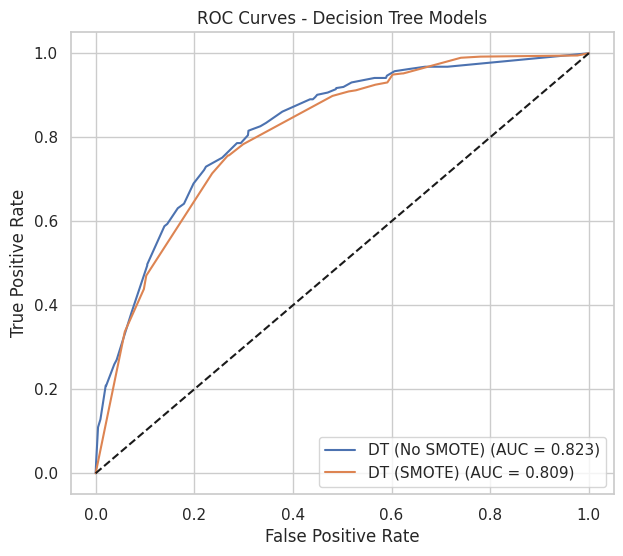

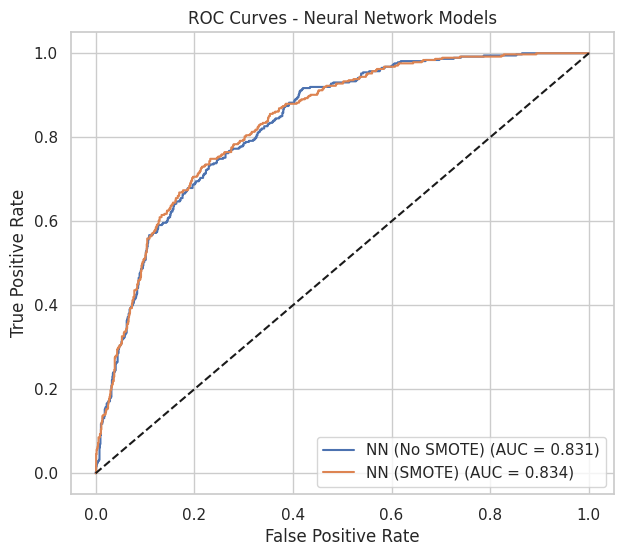

In [28]:
# Define the helper function plot_roc
def plot_roc(y_true, y_score, label):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.3f})')

# Plot for Decision Tree Models
plt.figure(figsize=(7,6))
plot_roc(y_test, y_proba_dt, label="DT (No SMOTE)")
plot_roc(y_test, y_proba_dt_sm, label="DT (SMOTE)")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves - Decision Tree Models")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Plot for Neural Network Models
plt.figure(figsize=(7,6))
plot_roc(y_test, y_proba_nn, label="NN (No SMOTE)")
plot_roc(y_test, y_proba_nn_sm, label="NN (SMOTE)")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curves - Neural Network Models")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
comparison = pd.DataFrame({
    "Model": ["DT_no_smote","NN_no_smote","DT_smote","NN_smote"],
    "Test Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_nn),
        accuracy_score(y_test, y_pred_dt_sm),
        accuracy_score(y_test, y_pred_nn_sm)
    ],
    "Test ROC AUC": [
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_nn),
        roc_auc_score(y_test, y_proba_dt_sm),
        roc_auc_score(y_test, y_proba_nn_sm)
    ]
})
comparison.round(4)


,Model,Test Accuracy,Test ROC AUC
0,DT_no_smote,0.7882,0.8226
1,NN_no_smote,0.8045,0.8310
2,DT_smote,0.7385,0.8093
3,NN_smote,0.7783,0.8337


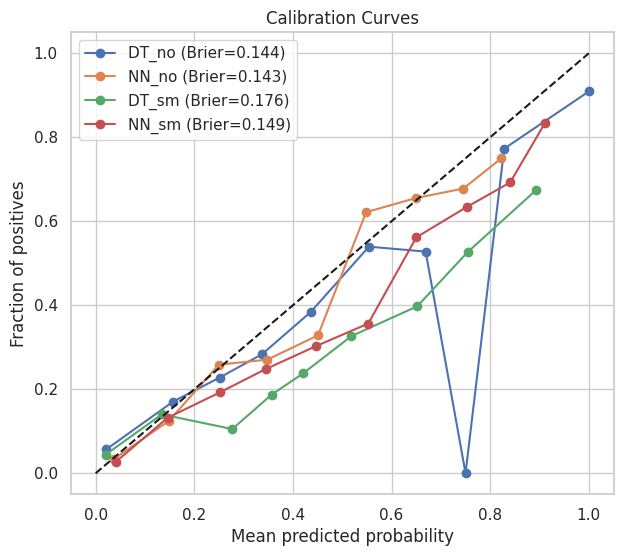

In [30]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(7,6))
for name, proba in [("DT_no", y_proba_dt), ("NN_no", y_proba_nn), ("DT_sm", y_proba_dt_sm), ("NN_sm", y_proba_nn_sm)]:
    prob_true, prob_pred = calibration_curve(y_test, proba, n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=f"{name} (Brier={brier_score_loss(y_test, proba):.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("Calibration Curves")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend(); plt.show()


# **Step 04: Model Comparison (Decision Tress vs Neural Networks)**

**4.1: Helper Function to Compute all metrics**

---



In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_metrics(model_name, y_train, y_pred_train, y_proba_train, y_test, y_pred, y_proba):

  return{
      "Model": model_name,

      # Train Metrics
      "Train Accuracy": accuracy_score(y_train, y_pred_train),
      "Train Precision": precision_score(y_train, y_pred_train),
      "Train Recall": recall_score(y_train, y_pred_train),
      "Train F1 Score": f1_score(y_train, y_pred_train),
      "Train ROC AUC": roc_auc_score(y_train, y_proba_train),

      # Test Metrics
      "Test Accuracy": accuracy_score(y_test, y_pred),
      "Test Precision": precision_score(y_test, y_pred),
      "Test Recall": recall_score(y_test, y_pred),
      "Test F1 Score": f1_score(y_test, y_pred),
      "Test ROC AUC": roc_auc_score(y_test, y_proba)
  }

**4.2: Collecting Metrics for All models**

---



In [34]:
results = []

# === DECISION TREE MODELS ===
results.append(
    get_metrics(
        "DT Baseline",
        y_train,y_pred_train_base_nn, y_proba_train_base_nn,
        y_test, y_pred_base_dt, y_proba_base_dt
    )
)

results.append(
    get_metrics(
        "DT Tuned",
        y_train, y_pred_train_dt, y_pred_proba_train_dt,
        y_test, y_pred_dt, y_proba_dt
    )
)

results.append(
    get_metrics(
        "DT SMOTE",
        y_train_sm, y_pred_train_dt_sm, y_pred_proba_train_dt_sm,
        y_test, y_pred_dt_sm, y_proba_dt_sm
    )
)

# === NEURAL NETWORK MODELS ===
results.append(
    get_metrics(
        "NN Baseline",
        y_train, y_pred_train_base_nn, y_proba_train_base_nn,
        y_test, y_pred_base_nn, y_proba_base_nn
    )
)

results.append(
    get_metrics(
        "NN Tuned",
        y_train, y_pred_train_nn, y_proba_train_nn,
        y_test, y_pred_nn, y_proba_nn
    )
)

results.append(
    get_metrics(
        "NN SMOTE",
        y_train_sm, y_pred_train_nn_sm, y_pred_proba_train_nn_sm,
        y_test, y_pred_nn_sm, y_proba_nn_sm
    )
)

comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.round(4)
comparison_df

,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train ROC AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC AUC
0,DT Baseline,0.8121,0.6792,0.5552,0.6110,0.8636,0.7129,0.4629,0.5000,0.4807,0.6452
1,DT Tuned,0.8089,0.6479,0.6154,0.6312,0.8745,0.7882,0.6044,0.5882,0.5962,0.8226
2,DT SMOTE,0.7977,0.7735,0.8419,0.8063,0.8763,0.7385,0.5054,0.7567,0.6060,0.8093
3,NN Baseline,0.8121,0.6792,0.5552,0.6110,0.8636,0.7918,0.6270,0.5348,0.5772,0.8285
4,NN Tuned,0.8068,0.6632,0.5545,0.6040,0.8543,0.8045,0.6523,0.5668,0.6066,0.8310
5,NN SMOTE,0.7812,0.8169,0.7249,0.7682,0.8727,0.7783,0.5701,0.6738,0.6176,0.8337


**4.4: Visual Comparison**

---



In [ ]:
plt.figure(figsize=(14,6))
sns.heatmap(comparison_df.set_index("Model"), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Comparison: Decision Tree vs Neural Network (Baseline, Tuned, SMOTE)")
plt.show()


In [ ]:
plt.figure(figsize=(10,8))

def plot_model_roc(model, X_test, y_test, label):
    proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") \
            else model.predict(X_test).flatten()
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_score = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc_score:.3f})")

# Decision Tree
plot_model_roc(baseline_dt, X_test_preprocessed, y_test, "DT Baseline")
plot_model_roc(best_model_dt, X_test_preprocessed, y_test, "DT Tuned")
plot_model_roc(best_dt_sm, X_test_preprocessed, y_test, "DT SMOTE")

# Neural Network
plot_model_roc(baseline_nn, X_test_preprocessed, y_test, "NN Baseline")
plot_model_roc(best_nn, X_test_preprocessed, y_test, "NN Tuned")
plot_model_roc(best_nn_sm, X_test_preprocessed, y_test, "NN SMOTE")

# Random guess line
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

plt.title("Combined ROC Curves (DT vs NN)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [ ]:
metrics_to_plot = ["Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score", "Test ROC AUC"]

plt.figure(figsize=(14,6))
comparison_df.set_index("Model")[metrics_to_plot].plot(kind="bar", figsize=(14,6))
plt.title("Model Comparison (Test Metrics Only)")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()

In [ ]:
results = {}

# Decision Tree - Baseline
results["DT Baseline"] = get_scores(
    y_test,
    y_pred_base_dt,
    y_proba_base_dt
)

# Decision Tree - Tuned
results["DT Tuned"] = get_scores(
    y_test,
    y_pred_dt,
    y_proba_dt
)

# Decision Tree - SMOTE
results["DT SMOTE"] = get_scores(
    y_test,
    y_pred_dt_sm,
    y_proba_dt_sm
)

# Neural Network - Baseline
results["NN Baseline"] = get_scores(
    y_test,
    y_pred_base_nn,
    y_proba_base_nn
)

# Neural Network - Tuned
results["NN Tuned"] = get_scores(
    y_test,
    y_pred_nn,
    y_proba_nn
)

# Neural Network - SMOTE
results["NN SMOTE"] = get_scores(
    y_test,
    y_pred_nn_sm,
    y_proba_nn_sm
)

**4.3: Covert to DataFrame**

---



In [ ]:
comparison_df = pd.DataFrame(results).T
comparison_df = comparison_df.round(4)
comparison_df

In [ ]:
plt.figure(figsize=(8,6))

plot_roc(y_test, y_proba_base_dt, label="DT Baseline")
plot_roc(y_test, y_proba_dt, label="DT Tuned")
plot_roc(y_test, y_proba_base_nn, label="NN Baseline")
plot_roc(y_test, y_proba_nn, label="NN Tuned")

plt.plot([0,1], [0,1], 'k--')
plt.title("ROC Comparison: Decision Tree vs Neural Networks")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()